# The baseline model
## Structure

The model looks like this:
![hackathon_model.png](images/hackathon_model.png)

**How do I run this experiment?**

```
# Make sure your PYTHONPATH is set correctly to the root

export PYTHONPATH=/path/to/project:$PYTHONPATH

python3 experiment.py
```

**How do I evaluate the model?**

```
python3 evaluation.py
```


In [11]:
import pandas
import matplotlib.pyplot as plt
import os
root = os.getcwd()

## Training

We trained for 50 epochs and selected the best model according to our validation loss:

In [12]:
training_df = pandas.read_csv(os.path.join(root, "output", "training.log"))
training_df

,epoch,loss,mse,val_loss,val_mse
0,1,0.381549,0.381549,0.401210,0.401209
1,2,0.370795,0.370795,0.387639,0.387638
2,3,0.360890,0.360890,0.379877,0.379876
3,4,0.355307,0.355307,0.380251,0.380250


### Training accuracy

<Figure size 432x288 with 0 Axes>

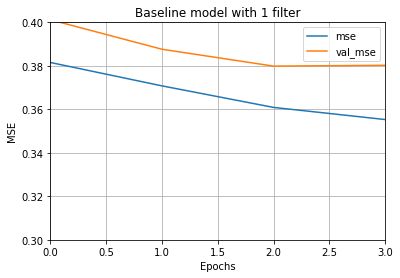

In [13]:
training_acc_columns = [x for x in list(training_df.columns) if "mse" in x]
plt.figure()
training_df[training_acc_columns].plot()
plt.grid(True)
plt.title("Baseline model with 1 filter")
plt.xlabel("Epochs")
plt.ylabel("MSE")

plt.ylim([0.3,0.4])

plt.show()

### Training loss

<Figure size 432x288 with 0 Axes>

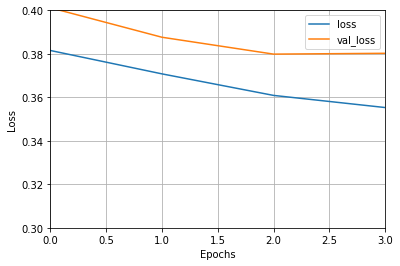

In [14]:
training_loss_columns = [x for x in list(training_df.columns) if "loss" in x]
plt.figure()
training_df[training_loss_columns].plot()
plt.grid(True)
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.ylim([0.3,0.4])

plt.show()

## Evaluation

In [15]:
with open(os.path.join(root, "output", "eval.json")) as fp:
    df = pandas.read_json(fp).T

Each point in the boxplot is the accuracy for one subject

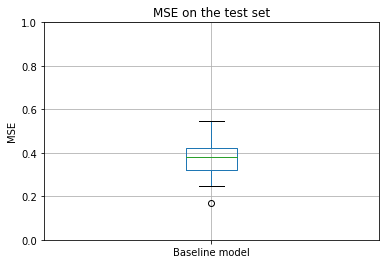

In [16]:
plt.figure()
df[["mean_squared_error"]].boxplot()
plt.ylim([0,1])
plt.ylabel("MSE")
plt.title("MSE on the test set")
plt.xticks(plt.xticks()[0], ["Baseline model"])
plt.show()